<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: Also known as the visible layer, it is what the data interacts with directly. hence the name "Inupt"
### Hidden Layer: No direct interaction, therefore there's no way to bring them ouu without the Input layer. They are hidden within the network.
### Output Layer: Known as the last nodes of the network, Their purpose is to act out as a format that adresses the problem the netowrk is tryin to solve by setting an output vector.
### Neuron: Another term for "nodes", they recieve inputs and pass it on to the next set of nodes once a certain thershold is reached.
### Weight: a modified input
### Activation Function: A transformed output fitted int to a format that will fit the function.
### Node Map: A visual structure of the Neural Network
### Perceptron: A node with nothing and can take ANY input to spit out an output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### starts off with a neuron, the neuron recieves inputs and 

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
class Perceptron(object):
    """Perceptron estimator with early stopping.
    
    :param learning_rate: float Estimator learning rate. Default == 0.01
    :param epochs: int Number of epochs to run Perceptron. Default = 1000
    :param early_stopping: int Number of epochs without imoprovement at which to stop estimator. Default = 10
    
    """
    
    def __init__(self, learning_rate=0.01, epochs=100, early_stopping=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.early_stopping = early_stopping
        
    def predict(self,row):
        """Apply weights and add bias to inputs.
        
        Return 1 if output is greater or equal zero, else zero for each element in input row.
        """
        
        return (np.dot(row, self.weight[1:]) + self.weight[0]) >= 0

    def fit(self, X, y):
        """Fit training data
        
        Initialize with random bias and weights.
        Update weights and bias with each row based on previous iteration's error.
        Store number of errors for each epoch.
        Stop if no errors in number of `early_stopping` epochs.
        """
        
        self.weight = np.array([np.random.random() for _ in range(X.shape[1] + 1)])
    
        self.errors_ = []
        
        for _ in range(self.epochs):
            error = 0
            for row, label in zip(X, y):
                
                # Check our current prediction against the actual label to get the error.
                # Multiply the result by the learning rate.
                adjustment = self.lr * (label - self.predict(row))
                
                # Adjust our weigts and bias accordingly.
                self.weight[1:] += adjustment * row
                self.weight[0] += adjustment
                
                # Add up our errors for each epoch.
                error += adjustment != 0.0
                
            # Make a list of number of errors per epoch.
            self.errors_.append(error)

            # If we've been correct each time for a number of rounds, stop already.
            if sum(self.errors_[-self.early_stopping:]) == 0:
                print('Stopped Early')
                break
                
        return self

In [60]:
data = { 'x1': [0,1,1,1],
        'x2': [0,1,0,1],
        'y':  [1,1,1,0]
      }

df = pd.DataFrame.from_dict(data)
df

,x1,x2,y
0,0,0,1
1,1,1,1
2,1,0,1
3,1,1,0


In [61]:
nand = np.array([np.array([0, 0]),
                 np.array([0, 1]),
                 np.array([1, 0]),
                 np.array([1, 1])
                ])
y = np.array([1, 1, 1, 0])

In [62]:
perceptron = Perceptron()

In [63]:
perceptron.fit(nand,y)

Stopped Early


In [67]:
perceptron.predict(np.array([np.array([0, 0]),
                             np.array([0, 1]),
                             np.array([1, 0]),
                             np.array([1, 1])]))

array([ True,  True,  True, False])

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species'].map(lambda x: 1.0 if x == 'Iris-setosa' else 0.0)

In [74]:
iris = Perceptron()

In [75]:
iris.fit(x.values, y.values)

Stopped Early


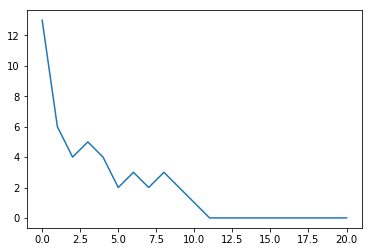

In [76]:
plt.plot(range(len(iris.errors_)), iris.errors_)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?